In [1]:
# Notebook based on PyData LA 2019 talk "Embedding everything"

#Quick cell to make jupyter notebook use the full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import umap
import umap.plot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Some plotting libraries
import matplotlib.pyplot as plt
%matplotlib notebook
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE 
output_notebook(resources=INLINE)
import pandas as pd

Loading BokehJS ...

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
alumne_escuela_id = pd.read_csv("app_alumno.csv")[["id", "escuela_id"]]
alumne_escuela_id.columns = ["alumne_id", "escuela_id"]

/home/jian01/.pyenv/versions/3.6.9/envs/argxed/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
full_dataset = pd.read_csv("super_join.csv")

In [85]:
full_dataset.columns

Index(['alumne_id', 'sexo', 'indice_socioeconomico', 'nivel_desemp_matematica',
       'nivel_desemp_lengua', 'nivel_desemp_ciencias_sociales',
       'nivel_desemp_ciencias_naturales', 'ponderador_lengua',
       'ponderador_matematica', 'ponderador_ciencias_naturales',
       'ponderador_ciencias_sociales', 'tiene_notebook', 'tiene_pc',
       'tiene_tablet', 'tiene_celular', 'tiene_smartphone', 'tiene_consola',
       'tiene_smarttv', 'tiene_cable', 'tiene_internet_alumne',
       'repeticion_primaria', 'repeticion_secundaria', 'year_id', 'nivel',
       'ambito', 'gestion', 'icse', 'icse_cat', 'indice_socioeconomico_medio',
       'indice_socioeconomico_medio_cat', 'tecnica', 'tiene_internet_escuela',
       'subvencion', 'dependencia', 'name_provincia', 'departamento_name',
       'tasa_con_nbi'],
      dtype='object')

In [88]:
full_dataset = full_dataset.merge(alumne_escuela_id, on="alumne_id")

In [89]:
full_dataset

alumne_id sexo indice_socioeconomico nivel_desemp_matematica  \
0                1   nc                   NaN           satisfactorio   
1              505   nc                   NaN                      nc   
2             1008   nc                   NaN                      nc   
3             1511   nc                   NaN                  basico   
4             2014   nc                   NaN   por_debajo_del_basico   
...            ...  ...                   ...                     ...   
1835705    1228996   nc                  bajo   por_debajo_del_basico   
1835706    1232312   nc                  bajo   por_debajo_del_basico   
1835707    1235628   nc                    nc   por_debajo_del_basico   
1835708    1238944   nc                  bajo   por_debajo_del_basico   
1835709    1242259   nc                 medio   por_debajo_del_basico   

           nivel_desemp_lengua nivel_desemp_ciencias_sociales  \
0                           nc                  satisfactorio   
1                     avanzado                       avanzado   
2                satisfactorio                         basico   
3                           nc                             nc   
4        por_debajo_del_basico                         basico   
...                        ...                            ...   
1835705  por_debajo_del_basico                         basico   
1835706                 basico          por_debajo_del_basico   
1835707                     nc          por_debajo_del_basico   
1835708  por_debajo_del_basico          por_debajo_del_basico   
1835709                 basico          por_debajo_del_basico   

        nivel_desemp_ciencias_naturales  ponderador_lengua  \
0                         satisfactorio          -1.000000   
1                         satisfactorio          33.289810   
2                         satisfactorio          33.289810   
3                                basico          -1.000000   
4                 por_debajo_del_basico          33.289810   
...                                 ...                ...   
1835705                          basico           2.454721   
1835706           por_debajo_del_basico           2.454721   
1835707           por_debajo_del_basico                NaN   
1835708           por_debajo_del_basico           2.454721   
1835709           por_debajo_del_basico           2.454721   

         ponderador_matematica  ponderador_ciencias_naturales  ...  \
0                    35.920963                      42.752556  ...   
1                    -1.000000                      42.752556  ...   
2                    -1.000000                      42.752556  ...   
3                    35.920963                      42.752556  ...   
4                    35.920963                      42.752556  ...   
...                        ...                            ...  ...   
1835705               2.201479                       2.189892  ...   
1835706               2.201479                       2.189892  ...   
1835707               2.201479                       2.189892  ...   
1835708               2.201479                       2.189892  ...   
1835709               2.201479                       2.189892  ...   

         indice_socioeconomico_medio indice_socioeconomico_medio_cat tecnica  \
0                             -1.000                             NaN       f   
1                             -1.000                             NaN       f   
2                             -1.000                             NaN       f   
3                             -1.000                             NaN       f   
4                             -1.000                             NaN       f   
...                              ...                             ...     ...   
1835705                        1.125                     tercil_bajo       f   
1835706                        1.125                     tercil_bajo       f   
1835707                        1.125         

In [143]:
MATERIA = "matematica"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
matematica = full_dataset.groupby(["escuela_id", "nivel_desemp_matematica"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
matematica.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
matematica.columns = [COL_MAP[c] for c in matematica.columns]
matematica = matematica[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                         "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
matematica["total"]=matematica["avanzado_%s" % MATERIA]+matematica["satisfactorio_%s" % MATERIA]+matematica["basico_%s" % MATERIA]+matematica["por_debajo_del_basico_%s" % MATERIA]
matematica["avanzado_%s" % MATERIA]=matematica["avanzado_%s" % MATERIA]/matematica["total"]
matematica["satisfactorio_%s" % MATERIA]=matematica["satisfactorio_%s" % MATERIA]/matematica["total"]
matematica["basico_%s" % MATERIA]=matematica["basico_%s" % MATERIA]/matematica["total"]
matematica["por_debajo_del_basico_%s" % MATERIA]=matematica["por_debajo_del_basico_%s" % MATERIA]/matematica["total"]
matematica=matematica.fillna(0)
matematica.sample(5)

escuela_id  avanzado_matematica  satisfactorio_matematica  \
27024  22146363927             0.000000                  0.070423   
21958  13120484816             1.000000                  0.000000   
5609    1454990424             0.102273                  0.375000   
15010   4201502214             0.037037                  0.370370   
25715  19683986424             0.200000                  0.600000   

       basico_matematica  por_debajo_del_basico_matematica  total  
27024           0.309859                          0.619718     71  
21958           0.000000                          0.000000      2  
5609            0.284091                          0.238636     88  
15010           0.370370                          0.222222     27  
25715           0.200000                          0.000000     10

In [142]:
MATERIA = "lengua"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
lengua = full_dataset.groupby(["escuela_id", "nivel_desemp_lengua"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
lengua.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
lengua.columns = [COL_MAP[c] for c in lengua.columns]
lengua = lengua[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                 "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
lengua["total"]=lengua["avanzado_%s" % MATERIA]+lengua["satisfactorio_%s" % MATERIA]+lengua["basico_%s" % MATERIA]+lengua["por_debajo_del_basico_%s" % MATERIA]
lengua["avanzado_%s" % MATERIA]=lengua["avanzado_%s" % MATERIA]/lengua["total"]
lengua["satisfactorio_%s" % MATERIA]=lengua["satisfactorio_%s" % MATERIA]/lengua["total"]
lengua["basico_%s" % MATERIA]=lengua["basico_%s" % MATERIA]/lengua["total"]
lengua["por_debajo_del_basico_%s" % MATERIA]=lengua["por_debajo_del_basico_%s" % MATERIA]/lengua["total"]
lengua=lengua.fillna(0)
lengua.sample(5)

escuela_id  avanzado_lengua  satisfactorio_lengua  basico_lengua  \
15194   4400518020         0.122449              0.346939       0.346939   
15526   4620114411         0.214286              0.464286       0.238095   
24457  17222593521         0.333333              0.333333       0.333333   
24818  18000634020         0.187500              0.375000       0.125000   
19699   9502557419         0.722222              0.277778       0.000000   

       por_debajo_del_basico_lengua  total  
15194                      0.183673     49  
15526                      0.083333     84  
24457                      0.000000      3  
24818                      0.312500     16  
19699                      0.000000     18

In [149]:
MATERIA = "cs_nat"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
cs_nat = full_dataset.groupby(["escuela_id", "nivel_desemp_ciencias_naturales"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
cs_nat.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
cs_nat.columns = [COL_MAP[c] for c in cs_nat.columns]
cs_nat = cs_nat[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                 "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
cs_nat["total"]=cs_nat["avanzado_%s" % MATERIA]+cs_nat["satisfactorio_%s" % MATERIA]+cs_nat["basico_%s" % MATERIA]+cs_nat["por_debajo_del_basico_%s" % MATERIA]
cs_nat["avanzado_%s" % MATERIA]=cs_nat["avanzado_%s" % MATERIA]/cs_nat["total"]
cs_nat["satisfactorio_%s" % MATERIA]=cs_nat["satisfactorio_%s" % MATERIA]/cs_nat["total"]
cs_nat["basico_%s" % MATERIA]=cs_nat["basico_%s" % MATERIA]/cs_nat["total"]
cs_nat["por_debajo_del_basico_%s" % MATERIA]=cs_nat["por_debajo_del_basico_%s" % MATERIA]/cs_nat["total"]
cs_nat=cs_nat.fillna(0)
cs_nat.sample(5)

escuela_id  avanzado_cs_nat  satisfactorio_cs_nat  basico_cs_nat  \
2509    1100352618         0.179487              0.461538       0.230769   
223      240098412         0.625000              0.250000       0.062500   
24051  20505460025         0.054348              0.652174       0.217391   
9024    1859715030         0.130952              0.726190       0.107143   
19288  11342841321         1.000000              0.000000       0.000000   

       por_debajo_del_basico_cs_nat  total  
2509                       0.128205     39  
223                        0.062500     16  
24051                      0.076087     92  
9024                       0.035714     84  
19288                      0.000000      1

In [150]:
MATERIA = "cs_sc"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
cs_sc = full_dataset.groupby(["escuela_id", "nivel_desemp_ciencias_sociales"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
cs_sc.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
cs_sc.columns = [COL_MAP[c] for c in cs_sc.columns]
cs_sc = cs_sc[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                 "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
cs_sc["total"]=cs_sc["avanzado_%s" % MATERIA]+cs_sc["satisfactorio_%s" % MATERIA]+cs_sc["basico_%s" % MATERIA]+cs_sc["por_debajo_del_basico_%s" % MATERIA]
cs_sc["avanzado_%s" % MATERIA]=cs_sc["avanzado_%s" % MATERIA]/cs_sc["total"]
cs_sc["satisfactorio_%s" % MATERIA]=cs_sc["satisfactorio_%s" % MATERIA]/cs_sc["total"]
cs_sc["basico_%s" % MATERIA]=cs_sc["basico_%s" % MATERIA]/cs_sc["total"]
cs_sc["por_debajo_del_basico_%s" % MATERIA]=cs_sc["por_debajo_del_basico_%s" % MATERIA]/cs_sc["total"]
cs_sc=cs_sc.fillna(0)
cs_sc.sample(5)

escuela_id  avanzado_cs_sc  satisfactorio_cs_sc  basico_cs_sc  \
10783   2380770117        0.076923             0.153846      0.384615   
12854   3520563248        0.000000             1.000000      0.000000   
22205  16501360025        0.000000             1.000000      0.000000   
2040    1023522417        0.130435             0.478261      0.217391   
9513    1949747232        0.331395             0.250000      0.215116   

       por_debajo_del_basico_cs_sc  total  
10783                     0.384615     13  
12854                     0.000000      3  
22205                     0.000000      1  
2040                      0.173913     46  
9513                      0.203488    172

In [327]:
total = matematica.merge(lengua, on="escuela_id").merge(cs_sc, on="escuela_id").merge(cs_nat, on="escuela_id")

In [328]:
total = total[[c for c in total.columns if "total" not in c and "cs" not in c]]

In [329]:
total.sample(5)

escuela_id  avanzado_matematica  satisfactorio_matematica  \
1822     977699216             0.000000                  0.187500   
9064    1919392931             0.000000                  0.210526   
23109  20280496626             0.096774                  0.500000   
22569  18869469123             0.025641                  0.384615   
18103  10501810221             0.000000                  0.333333   

       basico_matematica  por_debajo_del_basico_matematica  avanzado_lengua  \
1822            0.531250                          0.281250         0.096774   
9064            0.526316                          0.263158         0.088235   
23109           0.241935                          0.161290         0.230769   
22569           0.346154                          0.243590         0.164384   
18103           0.350877                          0.315789         0.041667   

       satisfactorio_lengua  basico_lengua  por_debajo_del_basico_lengua  
1822               0.322581       0.354839                      0.225806  
9064               0.411765       0.205882                      0.294118  
23109              0.476923       0.215385                      0.076923  
22569              0.479452       0.260274                      0.095890  
18103              0.291667       0.250000                      0.416667

In [330]:
escuelas = set(full_dataset["escuela_id"].value_counts()[full_dataset["escuela_id"].value_counts()>=40].index)

In [331]:
total = total[total["escuela_id"].isin(escuelas)]

In [332]:
high_dimension = np.array(total[[c for c in total.columns if c!="escuela_id"]])

In [333]:
high_dimension.dtype

dtype('float64')

In [346]:
umap_reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', min_dist=0.1,unique=True, random_state=311997)
low_dimension = umap_reducer.fit(high_dimension)

In [347]:
%matplotlib inline
umap_plot = umap.plot.points(low_dimension, theme='fire');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [348]:
app_escuela = pd.read_csv("app_escuela.csv")

In [349]:
app_escuela.columns

Index(['id', 'ambito', 'gestion', 'icse', 'icse_cat',
       'indice_socioeconomico_medio', 'indice_socioeconomico_medio_cat',
       'tecnica', 'tiene_internet', 'subvencion', 'dependencia',
       'departamento_id', 'provincia_id'],
      dtype='object')

In [350]:
escuelas = agg_escuela_id.reset_index().merge(app_escuela, left_on="escuela_id", right_on="id")[app_escuela.columns]

In [351]:
escuelas

id  ambito  gestion   icse      icse_cat  \
0         60000303  urbano  privada -1.000           NaN   
1         60003003  urbano  estatal  0.265  bajo_y_medio   
2         60030003  urbano  privada -1.000           NaN   
3         60300003  urbano  estatal  0.040  bajo_y_medio   
4         80000804  urbano  estatal  0.202  bajo_y_medio   
...            ...     ...      ...    ...           ...   
19757  33543853239   rural  estatal  0.411          alto   
19758  33546626139  urbano  estatal  0.198  bajo_y_medio   
19759  33547398339  urbano  privada -1.000           NaN   
19760  33547679139   rural  estatal  0.714       critico   
19761  33547714239   rural  estatal  0.800       critico   

       indice_socioeconomico_medio indice_socioeconomico_medio_cat tecnica  \
0                         2.173913                     tercil_alto       f   
1                         1.764706                    tercil_medio       f   
2                         2.389474                     tercil_alto       f   
3                         2.393939                     tercil_alto       f   
4                         1.818182                    tercil_medio       f   
...                            ...                             ...     ...   
19757                     1.642857                     tercil_bajo       f   
19758                     1.827160                    tercil_medio       f   
19759                     2.294118                     tercil_alto       f   
19760                     1.136364                     tercil_bajo       f   
19761                     1.238095                     tercil_bajo       f   

      tiene_internet              subvencion dependencia  departamento_id  \
0                  t        Subvención Total  provincial             84.0   
1                  t          No corresponde  provincial             84.0   
2                  t        Subvención Total  provincial             80.0   
3                  t          No corresponde  provincial             80.0   
4                  t          No corresponde  provincial             84.0   
...              ...                     ...         ...              ...   
19757              f          No corresponde  provincial            242.0   
19758              f          No corresponde  provincial            237.0   
19759              f  Más de 25% y hasta 50%  provincial            237.0   
19760              f          No corresponde  provincial            236.0   
19761              f          No corresponde  provincial            242.0   

       provincia_id  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
...             ...  
19757            21  
19758            21  
19759            21  
19760            21  
19761            21  

[19762 rows x 13 columns]

In [352]:
aux = total.merge(escuelas, left_on="escuela_id", right_on="id")

In [353]:
aux.columns

Index(['escuela_id', 'avanzado_matematica', 'satisfactorio_matematica',
       'basico_matematica', 'por_debajo_del_basico_matematica',
       'avanzado_lengua', 'satisfactorio_lengua', 'basico_lengua',
       'por_debajo_del_basico_lengua', 'id', 'ambito', 'gestion', 'icse',
       'icse_cat', 'indice_socioeconomico_medio',
       'indice_socioeconomico_medio_cat', 'tecnica', 'tiene_internet',
       'subvencion', 'dependencia', 'departamento_id', 'provincia_id'],
      dtype='object')

No handles with labels found to put in legend.


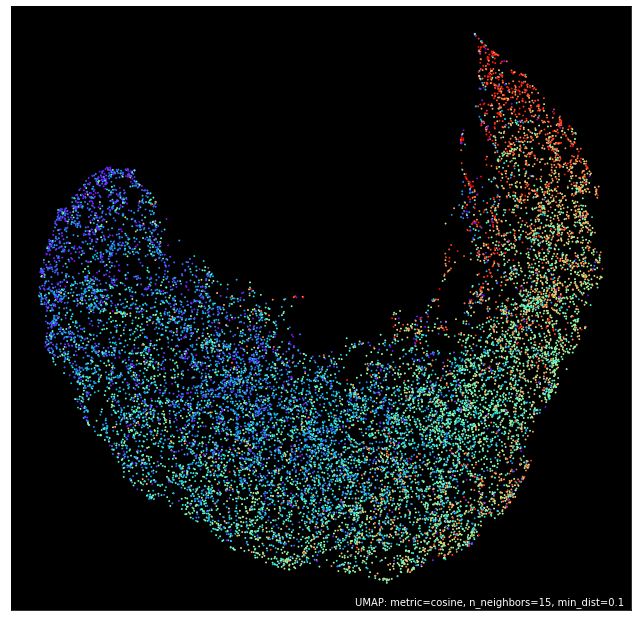

In [354]:
%matplotlib inline
umap_plot = umap.plot.points(low_dimension, labels=aux["indice_socioeconomico_medio"].values, theme='fire');
plt.legend().set_visible(False)

In [355]:
%matplotlib inline
umap_plot = umap.plot.points(low_dimension, labels=aux["gestion"].values, theme='fire');

No handles with labels found to put in legend.


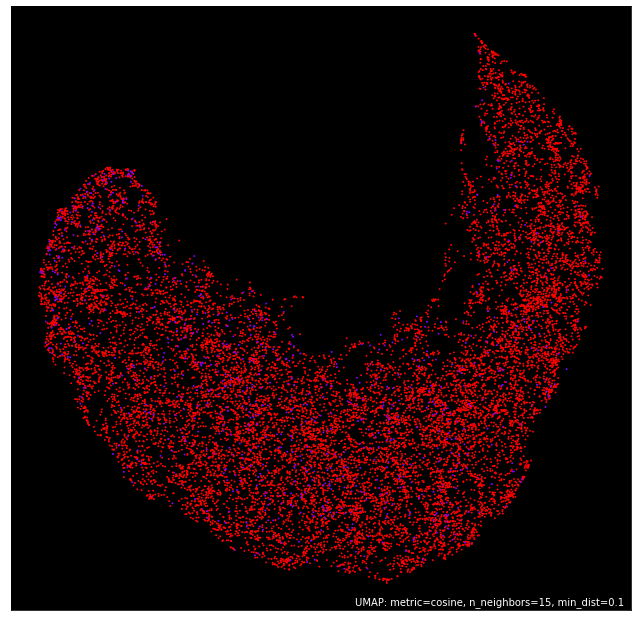

In [379]:
%matplotlib inline
umap_plot = umap.plot.points(low_dimension, labels=aux["ambito"].values, theme='fire');
plt.legend().set_visible(False)

In [380]:
%matplotlib inline
umap_plot = umap.plot.points(low_dimension, labels=aux["tecnica"].values, theme='fire');
plt.legend().set_visible(False)

No handles with labels found to put in legend.


No handles with labels found to put in legend.


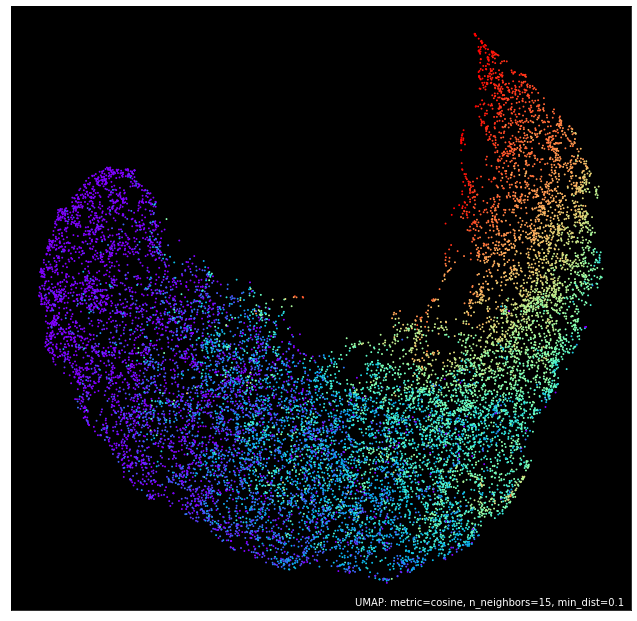

In [356]:
umap_plot = umap.plot.points(low_dimension, labels=aux["avanzado_matematica"].values, theme='fire')
plt.legend().set_visible(False)

No handles with labels found to put in legend.


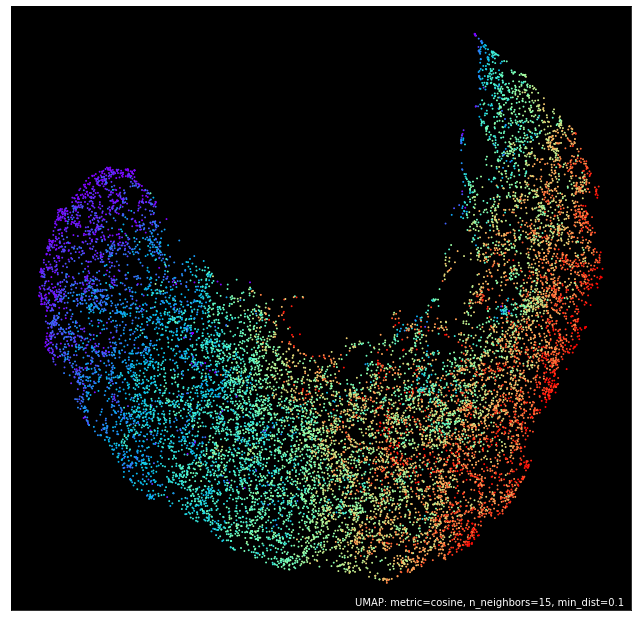

In [386]:
umap_plot = umap.plot.points(low_dimension, labels=aux["satisfactorio_matematica"].values, theme='fire')
plt.legend().set_visible(False)

No handles with labels found to put in legend.


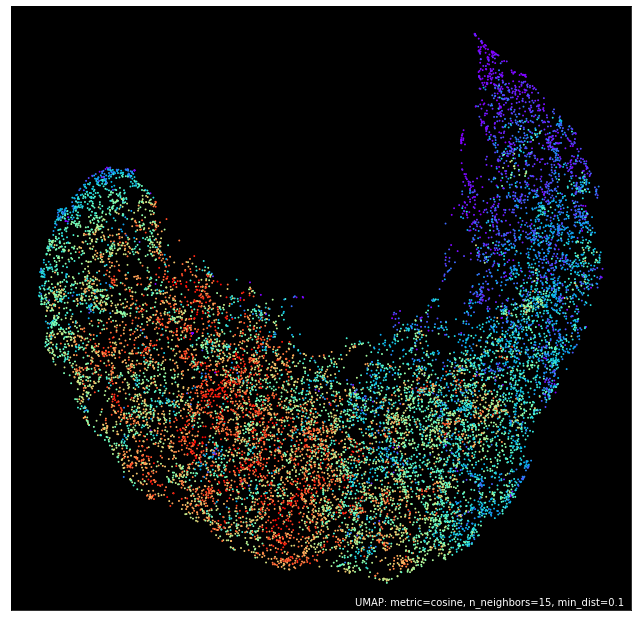

In [387]:
umap_plot = umap.plot.points(low_dimension, labels=aux["basico_matematica"].values, theme='fire')
plt.legend().set_visible(False)

No handles with labels found to put in legend.


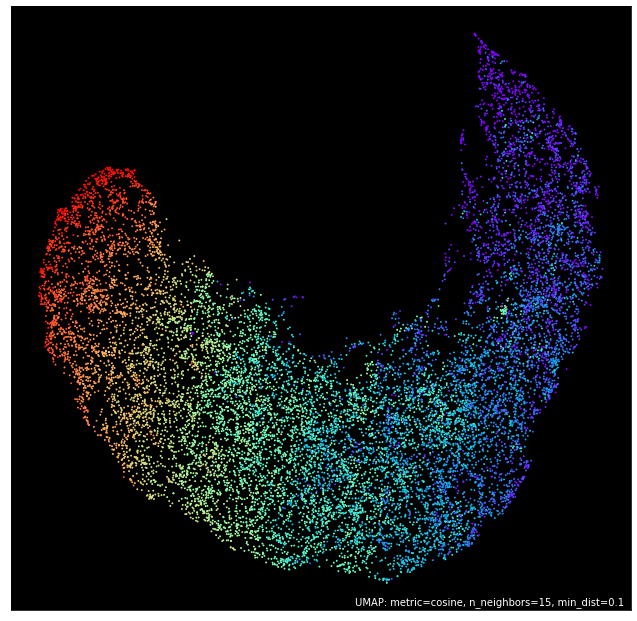

In [388]:
umap_plot = umap.plot.points(low_dimension, labels=aux["por_debajo_del_basico_matematica"].values, theme='fire')
plt.legend().set_visible(False)

No handles with labels found to put in legend.


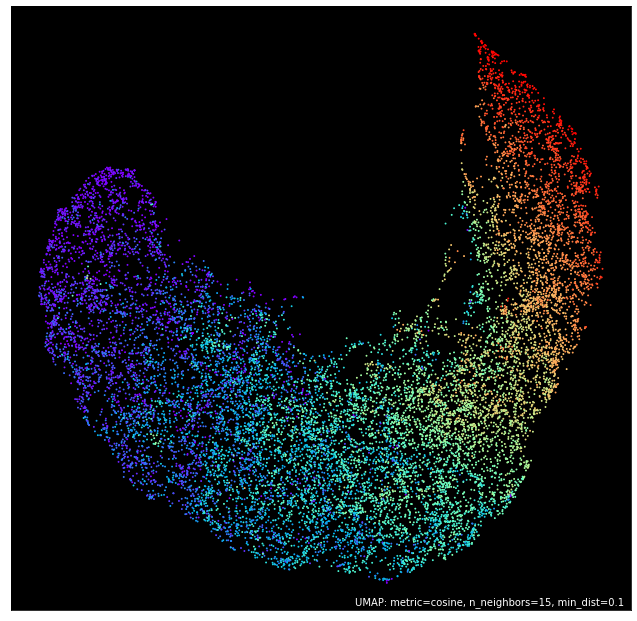

In [357]:
umap_plot = umap.plot.points(low_dimension, labels=aux["avanzado_lengua"].values, theme='fire')
plt.legend().set_visible(False)

No handles with labels found to put in legend.


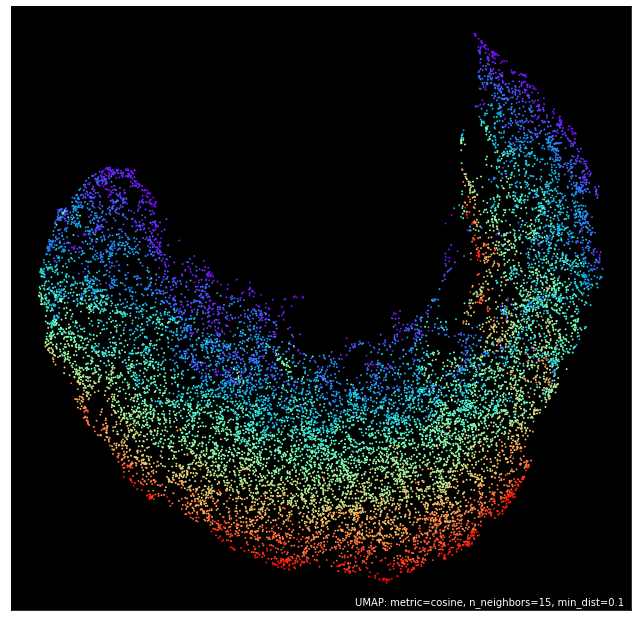

In [389]:
umap_plot = umap.plot.points(low_dimension, labels=aux["satisfactorio_lengua"].values, theme='fire')
plt.legend().set_visible(False)

No handles with labels found to put in legend.


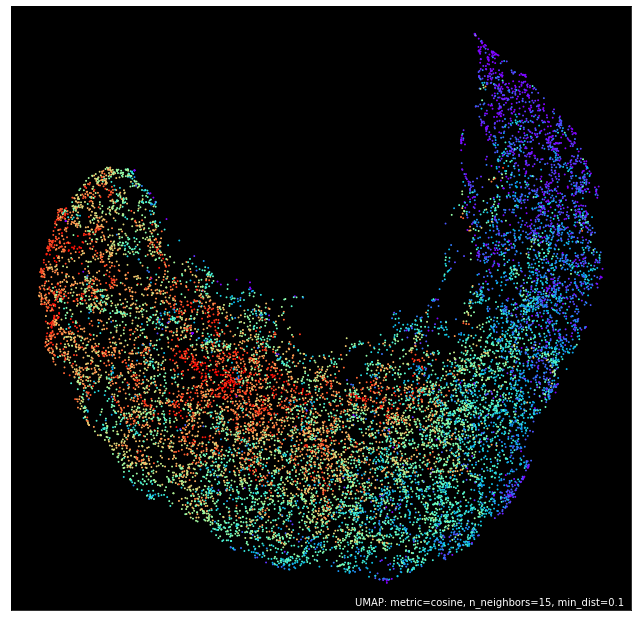

In [390]:
umap_plot = umap.plot.points(low_dimension, labels=aux["basico_lengua"].values, theme='fire')
plt.legend().set_visible(False)

No handles with labels found to put in legend.


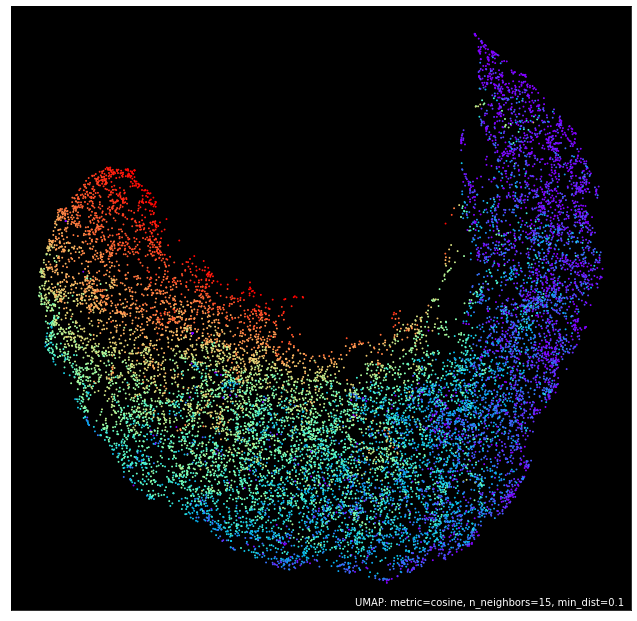

In [391]:
umap_plot = umap.plot.points(low_dimension, labels=aux["por_debajo_del_basico_lengua"].values, theme='fire')
plt.legend().set_visible(False)